In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tbparse import SummaryReader
from itertools import product

In [90]:
env_names = ["cartpole"]
algorithms = ["ppo"]

dfs = []

for env, algo in product(env_names, algorithms):
    log_dir = f"../data/{algo}_logs/{env}/"
    reader = SummaryReader(log_dir, extra_columns={"dir_name"})
    data = reader.scalars

    dfs.append(data)

df = pd.concat(dfs)

In [91]:
df

,step,tag,value,dir_name
0,89,rollout/ep_len_mean,22.250000,DQN_1
1,160,rollout/ep_len_mean,20.000000,DQN_1
2,242,rollout/ep_len_mean,20.166666,DQN_1
3,314,rollout/ep_len_mean,19.625000,DQN_1
4,406,rollout/ep_len_mean,20.299999,DQN_1
...,...,...,...,...
39005,90500,train/value_loss,107.085876,train/9/pretrain_combined/128/logs/PPO_1
39006,92500,train/value_loss,112.120926,train/9/pretrain_combined/128/logs/PPO_1
39007,94500,train/value_loss,99.728409,train/9/pretrain_combined/128/logs/PPO_1
39008,96500,train/value_loss,103.826950,train/9/pretrain_combined/128/logs/PPO_1


In [93]:
df = df[df["dir_name"].str.contains("DQN_")]

In [85]:
split_cols = df["dir_name"].str.split("/", expand=True)
df["seed"] = split_cols[0]
df["algorithm"] = split_cols[1]

KeyError: 1

In [79]:
df

,step,tag,value,dir_name,seed,algorithm
0,500,eval/mean_ep_length,426.799988,0/normal/128/logs/PPO_1,0,normal
1,1000,eval/mean_ep_length,500.000000,0/normal/128/logs/PPO_1,0,normal
2,1500,eval/mean_ep_length,283.399994,0/normal/128/logs/PPO_1,0,normal
3,2000,eval/mean_ep_length,416.399994,0/normal/128/logs/PPO_1,0,normal
4,2500,eval/mean_ep_length,315.600006,0/normal/128/logs/PPO_1,0,normal
...,...,...,...,...,...,...
19575,90500,train/value_loss,107.085876,9/pretrain_combined/128/logs/PPO_1,9,pretrain_combined
19576,92500,train/value_loss,112.120926,9/pretrain_combined/128/logs/PPO_1,9,pretrain_combined
19577,94500,train/value_loss,99.728409,9/pretrain_combined/128/logs/PPO_1,9,pretrain_combined
19578,96500,train/value_loss,103.826950,9/pretrain_combined/128/logs/PPO_1,9,pretrain_combined


In [80]:
df.loc[df["algorithm"] == "normal", "algorithm"] = "PDQNPO"
df.loc[df["algorithm"] == "pretrain_combined", "algorithm"] = "PPO + Embedding Module"


In [95]:
df

,step,tag,value,dir_name
0,89,rollout/ep_len_mean,22.250000,DQN_1
1,160,rollout/ep_len_mean,20.000000,DQN_1
2,242,rollout/ep_len_mean,20.166666,DQN_1
3,314,rollout/ep_len_mean,19.625000,DQN_1
4,406,rollout/ep_len_mean,20.299999,DQN_1
...,...,...,...,...
19425,99689,train/loss,0.256236,DQN_2
19426,99726,train/loss,0.189031,DQN_2
19427,99791,train/loss,0.183401,DQN_2
19428,99842,train/loss,0.123708,DQN_2


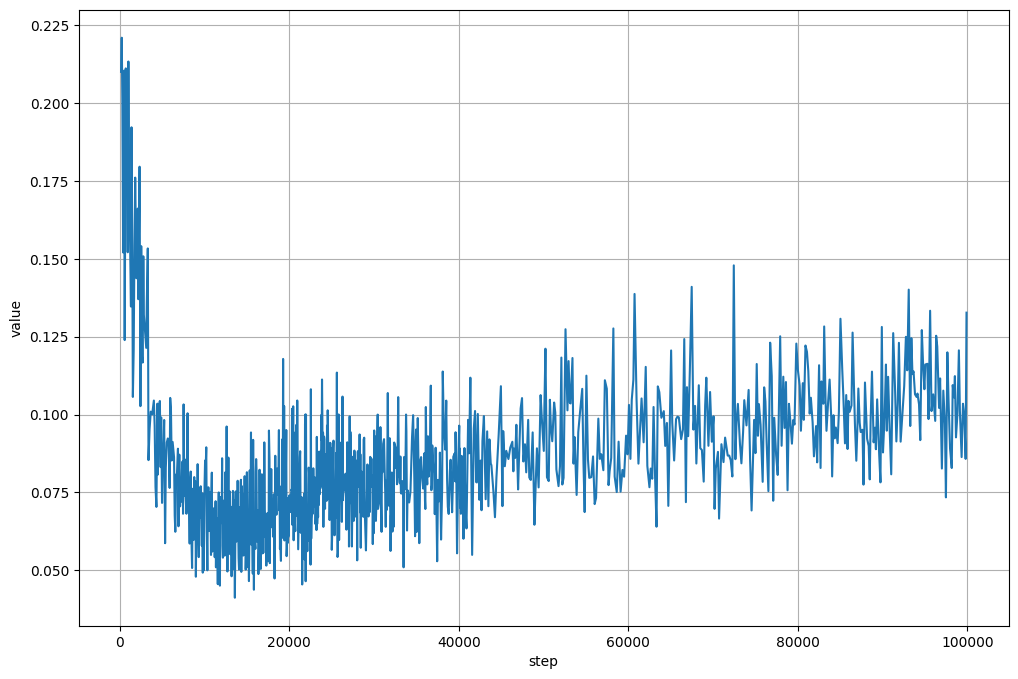

In [102]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df[df["tag"] == "train/reconstruction_loss"], y="value", x="step")
plt.grid(True)
plt.title("Reconstruction Loss")
plt.savefig("../figures/dqn_reconstr_cartpole.png", dpi=300)
plt.savefig("../figures/dqn_reconstr_cartpole.pdf", bbox_inches="tight")

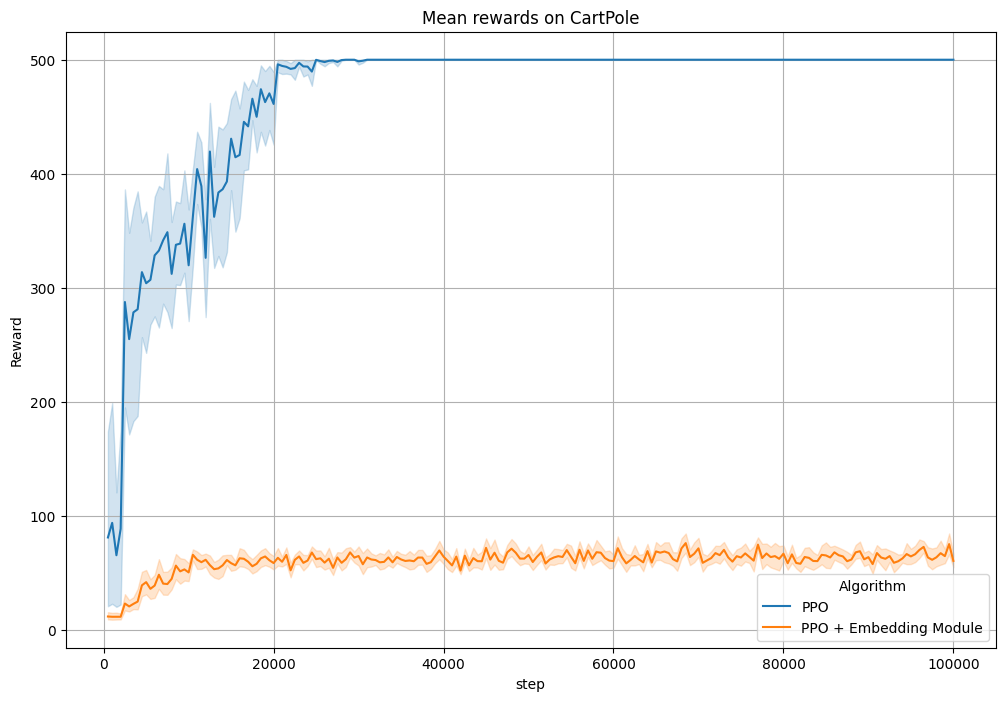

In [82]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df[(df["tag"] == "eval/mean_reward") & (df["algorithm"] != "pretrain_qloss")], y="value", x="step", hue="algorithm")
plt.grid(True)
plt.title("Mean rewards on CartPole")
plt.ylabel("Reward")
plt.xlabel("step")
plt.legend(title="Algorithm")
plt.savefig("../figures/ppo_reward_cartpole.png", dpi=300)
plt.savefig("../figures/ppo_reward_cartpole.pdf", bbox_inches="tight")